##Set up virtual environment:

source env/Scripts/activate
pip install pandas matplotlib seaborn requests


##Deactivate virtual environment when finished:

deactivate



##DATA CLEANING:
Bring in necessary libraries



In [238]:
import pandas as pd
import numpy as np
import seaborn as sns




Load data csv and determine shape 

In [239]:
df = pd.read_csv(r'C:\Users\molly\projects\mid_mile\data\fire_timeseries.csv')
print(df.shape)
print(df.head)

(37, 36)
<bound method NDFrame.head of     YEAR      area_km2    area_acres  freq_1000    mean_km2    mean_acres  \
0   1984   3527.388167  8.716366e+05         66   50.886298  12574.278149   
1   1985   9725.273289  2.403167e+06        119   80.097788  19792.594500   
2   1986   4962.403004  1.226236e+06         85   56.681252  14006.242397   
3   1987   6687.089163  1.652416e+06         82   79.529767  19652.233291   
4   1988  14061.155977  3.474587e+06         78  178.445346  44094.805382   
5   1989   2992.577496  7.394820e+05         60   47.068344  11630.841134   
6   1990   3672.695392  9.075428e+05         43   82.597736  20410.345092   
7   1991   1982.034507  4.897714e+05         38   49.967882  12347.332489   
8   1992   5036.299909  1.244497e+06         61   80.266529  19834.291255   
9   1993   2456.794515  6.070871e+05         19  124.896577  30862.616363   
10  1994   9212.873198  2.276551e+06        114   78.584862  19418.742418   
11  1995   3477.150784  8.592227e+05 

Inspect data with .info and .describe
Look for "null"

In [240]:
print(df.info())
print(df.describe(include='all'))
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               37 non-null     int64  
 1   area_km2           37 non-null     float64
 2   area_acres         37 non-null     float64
 3   freq_1000          37 non-null     int64  
 4   mean_km2           37 non-null     float64
 5   mean_acres         37 non-null     float64
 6   freq_mega          37 non-null     int64  
 7   acres_max          37 non-null     float64
 8   acres_event        37 non-null     object 
 9   AZ_acres_max       36 non-null     float64
 10  AZ_name            36 non-null     object 
 11  CA_acres_max       37 non-null     float64
 12  CA_name            37 non-null     object 
 13  CO_acres_max       36 non-null     float64
 14  CO_name            36 non-null     object 
 15  ID_acres_max       37 non-null     float64
 16  ID_name            37 non-nu

No Nulls, Look for NA

In [241]:
print(df.isna().sum())

YEAR                 0
area_km2             0
area_acres           0
freq_1000            0
mean_km2             0
mean_acres           0
freq_mega            0
acres_max            0
acres_event          0
AZ_acres_max         1
AZ_name              1
CA_acres_max         0
CA_name              0
CO_acres_max         1
CO_name              1
ID_acres_max         0
ID_name              0
MT_acres_max         0
MT_name              0
NM_acres_max         4
NM_name              4
NV_acres_max         0
NV_name              0
OR_acres_max         0
OR_name              0
UT_acres_max         0
UT_name              0
WA_acres_max         0
WA_name              0
WY_acres_max         4
WY_name              4
area_acres_scaled    0
years_scaled         0
max_scaled           0
mean_scaled          0
mega_scaled          0
dtype: int64


Find the rows with NA values

In [242]:
missing_rows = df[df.isna().any(axis=1)]
print(missing_rows)

    YEAR     area_km2    area_acres  freq_1000    mean_km2    mean_acres  \
0   1984  3527.388167  8.716366e+05         66   50.886298  12574.278149   
1   1985  9725.273289  2.403167e+06        119   80.097788  19792.594500   
2   1986  4962.403004  1.226236e+06         85   56.681252  14006.242397   
3   1987  6687.089163  1.652416e+06         82   79.529767  19652.233291   
6   1990  3672.695392  9.075428e+05         43   82.597736  20410.345092   
9   1993  2456.794515  6.070871e+05         19  124.896577  30862.616363   
13  1997  1773.251124  4.381799e+05         19   87.865798  21712.111459   
14  1998  2516.979911  6.219593e+05         42   56.271752  13905.052666   

    freq_mega      acres_max       acres_event  AZ_acres_max  ...  \
0           1   28870.151374          rabbit 2    523.149532  ...   
1           2  122709.679909        wheeler #2    399.956215  ...   
2           1   68545.955256       bogus creek   2279.163301  ...   
3           1   67997.154696        kin

replace NAN with 'unkown'

In [243]:
columns_to_fill = ['AZ_acres_max', 'AZ_name', 'CO_acres_max', 'CO_name', 'NM_acres_max', 'NM_acres', 'WY_acres_max', 'WY_name']

for col in columns_to_fill:
    if col in df.columns:
        df[col] = df[col].fillna('unknown')


print(df.isna().sum())


YEAR                 0
area_km2             0
area_acres           0
freq_1000            0
mean_km2             0
mean_acres           0
freq_mega            0
acres_max            0
acres_event          0
AZ_acres_max         0
AZ_name              0
CA_acres_max         0
CA_name              0
CO_acres_max         0
CO_name              0
ID_acres_max         0
ID_name              0
MT_acres_max         0
MT_name              0
NM_acres_max         0
NM_name              4
NV_acres_max         0
NV_name              0
OR_acres_max         0
OR_name              0
UT_acres_max         0
UT_name              0
WA_acres_max         0
WA_name              0
WY_acres_max         0
WY_name              0
area_acres_scaled    0
years_scaled         0
max_scaled           0
mean_scaled          0
mega_scaled          0
dtype: int64


Clean up floats, round them to only 1 decimal place.


In [244]:
df = df.round(1)

df



,YEAR,area_km2,area_acres,freq_1000,mean_km2,mean_acres,freq_mega,acres_max,acres_event,AZ_acres_max,...,UT_name,WA_acres_max,WA_name,WY_acres_max,WY_name,area_acres_scaled,years_scaled,max_scaled,mean_scaled,mega_scaled
0,1984,3527.4,871636.6,66,50.9,12574.3,1,28870.2,rabbit 2,523.149532,...,out of,115.8,yaxon canyon,129.152352,half moon,10.4,0.0,97.6,98.8,100.0
1,1985,9725.3,2403167.4,119,80.1,19792.6,2,122709.7,wheeler #2,399.956215,...,pine creek,36905.4,barker mtn,1033.035974,lyndas fire,28.7,2.8,88.5,89.9,91.7
2,1986,4962.4,1226236.5,85,56.7,14006.2,1,68546.0,bogus creek,2279.163301,...,oak grove,656.0,ace creek,4176.977197,collins peak,14.6,5.6,93.8,97.1,100.0
3,1987,6687.1,1652415.7,82,79.5,19652.2,1,67997.2,king titus,11585.114157,...,squaw creek,20379.1,coulee city,2390.645241,adams hill,19.7,8.3,93.8,90.1,100.0
4,1988,14061.2,3474587.3,78,178.4,44094.8,5,491780.3,north fork,1897.195368,...,affleck park,22145.1,white mountain,491780.297306,north fork,41.5,11.1,52.6,59.9,66.7
5,1989,2992.6,739482.0,60,47.1,11630.8,1,20066.1,dooley mtn,473.036991,...,diamond peak,3455.2,valley rd,3320.515842,ann's fire,8.8,13.9,98.5,100.0,100.0
6,1990,3672.7,907542.8,43,82.6,20410.3,1,76964.7,pine springs,3485.607436,...,big hollow,24840.7,locust grove,unknown,unknown,10.8,16.7,93.0,89.2,100.0
7,1991,1982.0,489771.4,38,50.0,12347.3,2,138105.4,blaine c,3158.1964,...,julius flat,6229.5,lincoln 3,8635.831101,dry cottonwood,5.8,19.4,87.0,99.1,91.7
8,1992,5036.3,1244496.8,61,80.3,19834.3,2,150473.9,black ridge,743.396802,...,deseret/spring canyon,871.4,oh no,384.70786,dell creek,14.9,22.2,85.8,89.9,91.7
9,1993,2456.8,607087.1,19,124.9,30862.6,1,38534.7,green meadows,450.914704,...,flat canyon,575.5,sprague 2,unknown,unknown,7.2,25.0,96.7,76.2,100.0


Not all columns rounded. checking column type

In [245]:
print(df.dtypes)

YEAR                   int64
area_km2             float64
area_acres           float64
freq_1000              int64
mean_km2             float64
mean_acres           float64
freq_mega              int64
acres_max            float64
acres_event           object
AZ_acres_max          object
AZ_name               object
CA_acres_max         float64
CA_name               object
CO_acres_max          object
CO_name               object
ID_acres_max         float64
ID_name               object
MT_acres_max         float64
MT_name               object
NM_acres_max          object
NM_name               object
NV_acres_max         float64
NV_name               object
OR_acres_max         float64
OR_name               object
UT_acres_max         float64
UT_name               object
WA_acres_max         float64
WA_name               object
WY_acres_max          object
WY_name               object
area_acres_scaled    float64
years_scaled         float64
max_scaled           float64
mean_scaled   

Change columns types with numbers to float instead of object

In [246]:
cols_to_float= ['AZ_acres_max', 'acres_event', 'CO_acres_max', 'NM_acres_max', 'WY_acres_max'] 

for col in cols_to_float:
    df[col] = pd.to_numeric(df[col], errors='coerce').round(1) 



df

,YEAR,area_km2,area_acres,freq_1000,mean_km2,mean_acres,freq_mega,acres_max,acres_event,AZ_acres_max,...,UT_name,WA_acres_max,WA_name,WY_acres_max,WY_name,area_acres_scaled,years_scaled,max_scaled,mean_scaled,mega_scaled
0,1984,3527.4,871636.6,66,50.9,12574.3,1,28870.2,NaN,523.1,...,out of,115.8,yaxon canyon,129.2,half moon,10.4,0.0,97.6,98.8,100.0
1,1985,9725.3,2403167.4,119,80.1,19792.6,2,122709.7,NaN,400.0,...,pine creek,36905.4,barker mtn,1033.0,lyndas fire,28.7,2.8,88.5,89.9,91.7
2,1986,4962.4,1226236.5,85,56.7,14006.2,1,68546.0,NaN,2279.2,...,oak grove,656.0,ace creek,4177.0,collins peak,14.6,5.6,93.8,97.1,100.0
3,1987,6687.1,1652415.7,82,79.5,19652.2,1,67997.2,NaN,11585.1,...,squaw creek,20379.1,coulee city,2390.6,adams hill,19.7,8.3,93.8,90.1,100.0
4,1988,14061.2,3474587.3,78,178.4,44094.8,5,491780.3,NaN,1897.2,...,affleck park,22145.1,white mountain,491780.3,north fork,41.5,11.1,52.6,59.9,66.7
5,1989,2992.6,739482.0,60,47.1,11630.8,1,20066.1,NaN,473.0,...,diamond peak,3455.2,valley rd,3320.5,ann's fire,8.8,13.9,98.5,100.0,100.0
6,1990,3672.7,907542.8,43,82.6,20410.3,1,76964.7,NaN,3485.6,...,big hollow,24840.7,locust grove,NaN,unknown,10.8,16.7,93.0,89.2,100.0
7,1991,1982.0,489771.4,38,50.0,12347.3,2,138105.4,NaN,3158.2,...,julius flat,6229.5,lincoln 3,8635.8,dry cottonwood,5.8,19.4,87.0,99.1,91.7
8,1992,5036.3,1244496.8,61,80.3,19834.3,2,150473.9,NaN,743.4,...,deseret/spring canyon,871.4,oh no,384.7,dell creek,14.9,22.2,85.8,89.9,91.7
9,1993,2456.8,607087.1,19,124.9,30862.6,1,38534.7,NaN,450.9,...,flat canyon,575.5,sprague 2,NaN,unknown,7.2,25.0,96.7,76.2,100.0


Look to see if there is a "wheeler" since there is "wheeler #2"

In [247]:
search_word = 'wheeler'
mask = df.apply(lambda row: row.astype(str).str.contains(search_word, case=False).any(), axis=1)
matches = df[mask]

matches


,YEAR,area_km2,area_acres,freq_1000,mean_km2,mean_acres,freq_mega,acres_max,acres_event,AZ_acres_max,...,UT_name,WA_acres_max,WA_name,WY_acres_max,WY_name,area_acres_scaled,years_scaled,max_scaled,mean_scaled,mega_scaled
1,1985,9725.3,2403167.4,119,80.1,19792.6,2,122709.7,NaN,400.0,...,pine creek,36905.4,barker mtn,1033.0,lyndas fire,28.7,2.8,88.5,89.9,91.7


Didn't end up messing with the above, had to keep moving and it didnt' seem critial.

##Create new dataframe with cleaned data

In [ ]:
df_clean = df
df_clean

,YEAR,area_km2,area_acres,freq_1000,mean_km2,mean_acres,freq_mega,acres_max,acres_event,AZ_acres_max,...,UT_name,WA_acres_max,WA_name,WY_acres_max,WY_name,area_acres_scaled,years_scaled,max_scaled,mean_scaled,mega_scaled
0,1984,3527.4,871636.6,66,50.9,12574.3,1,28870.2,NaN,523.1,...,out of,115.8,yaxon canyon,129.2,half moon,10.4,0.0,97.6,98.8,100.0
1,1985,9725.3,2403167.4,119,80.1,19792.6,2,122709.7,NaN,400.0,...,pine creek,36905.4,barker mtn,1033.0,lyndas fire,28.7,2.8,88.5,89.9,91.7
2,1986,4962.4,1226236.5,85,56.7,14006.2,1,68546.0,NaN,2279.2,...,oak grove,656.0,ace creek,4177.0,collins peak,14.6,5.6,93.8,97.1,100.0
3,1987,6687.1,1652415.7,82,79.5,19652.2,1,67997.2,NaN,11585.1,...,squaw creek,20379.1,coulee city,2390.6,adams hill,19.7,8.3,93.8,90.1,100.0
4,1988,14061.2,3474587.3,78,178.4,44094.8,5,491780.3,NaN,1897.2,...,affleck park,22145.1,white mountain,491780.3,north fork,41.5,11.1,52.6,59.9,66.7
5,1989,2992.6,739482.0,60,47.1,11630.8,1,20066.1,NaN,473.0,...,diamond peak,3455.2,valley rd,3320.5,ann's fire,8.8,13.9,98.5,100.0,100.0
6,1990,3672.7,907542.8,43,82.6,20410.3,1,76964.7,NaN,3485.6,...,big hollow,24840.7,locust grove,NaN,unknown,10.8,16.7,93.0,89.2,100.0
7,1991,1982.0,489771.4,38,50.0,12347.3,2,138105.4,NaN,3158.2,...,julius flat,6229.5,lincoln 3,8635.8,dry cottonwood,5.8,19.4,87.0,99.1,91.7
8,1992,5036.3,1244496.8,61,80.3,19834.3,2,150473.9,NaN,743.4,...,deseret/spring canyon,871.4,oh no,384.7,dell creek,14.9,22.2,85.8,89.9,91.7
9,1993,2456.8,607087.1,19,124.9,30862.6,1,38534.7,NaN,450.9,...,flat canyon,575.5,sprague 2,NaN,unknown,7.2,25.0,96.7,76.2,100.0


##EDA:
Looking for trends in acerage burned over time and by state.  


In [249]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [250]:
df_clean.shape
df_clean.info()
df_clean.describe
df_clean.head()
df_clean.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               37 non-null     int64  
 1   area_km2           37 non-null     float64
 2   area_acres         37 non-null     float64
 3   freq_1000          37 non-null     int64  
 4   mean_km2           37 non-null     float64
 5   mean_acres         37 non-null     float64
 6   freq_mega          37 non-null     int64  
 7   acres_max          37 non-null     float64
 8   acres_event        0 non-null      float64
 9   AZ_acres_max       36 non-null     float64
 10  AZ_name            37 non-null     object 
 11  CA_acres_max       37 non-null     float64
 12  CA_name            37 non-null     object 
 13  CO_acres_max       36 non-null     float64
 14  CO_name            37 non-null     object 
 15  ID_acres_max       37 non-null     float64
 16  ID_name            37 non-nu

Index(['YEAR', 'area_km2', 'area_acres', 'freq_1000', 'mean_km2', 'mean_acres',
       'freq_mega', 'acres_max', 'acres_event', 'AZ_acres_max', 'AZ_name',
       'CA_acres_max', 'CA_name', 'CO_acres_max', 'CO_name', 'ID_acres_max',
       'ID_name', 'MT_acres_max', 'MT_name', 'NM_acres_max', 'NM_name',
       'NV_acres_max', 'NV_name', 'OR_acres_max', 'OR_name', 'UT_acres_max',
       'UT_name', 'WA_acres_max', 'WA_name', 'WY_acres_max', 'WY_name',
       'area_acres_scaled', 'years_scaled', 'max_scaled', 'mean_scaled',
       'mega_scaled'],
      dtype='object')

Look at the Max acres burned per year

In [251]:
grouped = df.groupby('YEAR')['acres_max'].max()
print(grouped.head()) 
print(grouped.describe())


YEAR
1984     28870.2
1985    122709.7
1986     68546.0
1987     67997.2
1988    491780.3
Name: acres_max, dtype: float64
count    3.700000e+01
mean     1.987233e+05
std      1.998817e+05
min      4.698000e+03
25%      7.696470e+04
50%      1.537647e+05
75%      2.336713e+05
max      1.032675e+06
Name: acres_max, dtype: float64


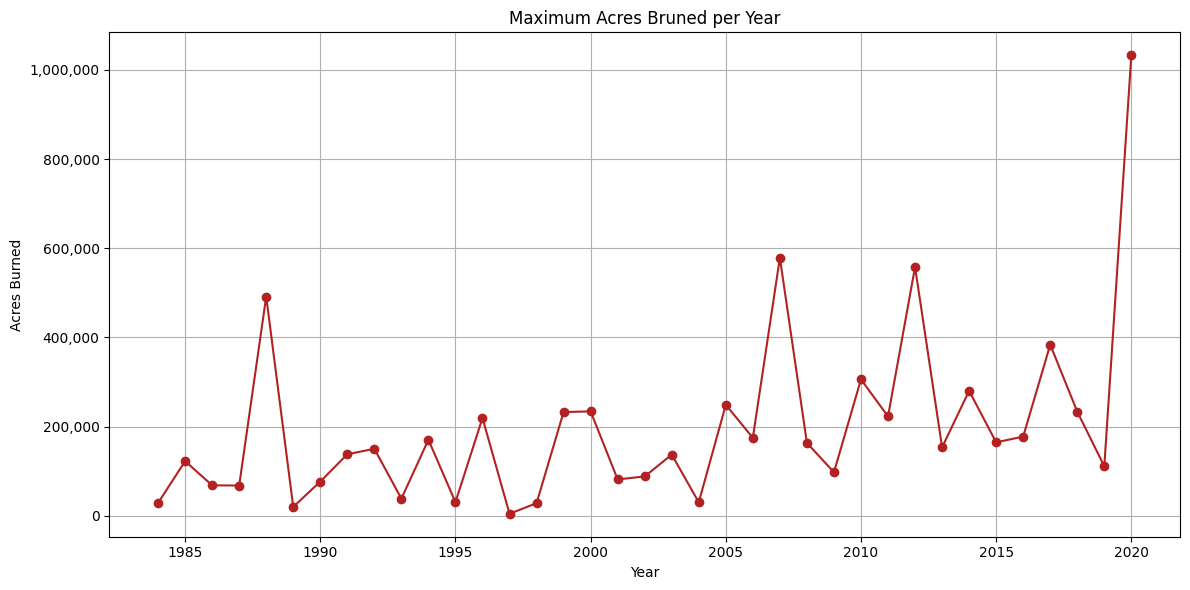

In [252]:
#groups by year to get the max
yearly_max = df.groupby('YEAR')['acres_max'].max()

#generate the plot
plt.figure(figsize=(12,6))
plt.plot(yearly_max.index, yearly_max.values, marker='o', color='firebrick')

#Title and labels
plt.title('Maximum Acres Bruned per Year')
plt.xlabel('Year')
plt.ylabel('Acres Burned')

#format y-axis more becasue I don't like the default 
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))




plt.grid(True)
plt.tight_layout()
plt.show()


Add which state each burn occured in.  Create new variables for state acrerage max and states.

In [253]:
state_acres = ['AZ_acres_max', 'CA_acres_max', 'CO_acres_max',
               'ID_acres_max', 'MT_acres_max', 'NM_acres_max',
               'NV_acres_max', 'OR_acres_max', 'UT_acres_max',
               'WA_acres_max', 'WY_acres_max',]

state_names = ['AZ_name', 'CA_name','CO_name', 
               'ID_name', 'MT_name', 'NM_name',
               'NV_name', 'OR_name', 'UT_name',
               'WA_name', 'WY_name']


Add in state names associated with each max, otherwise same plot as above  

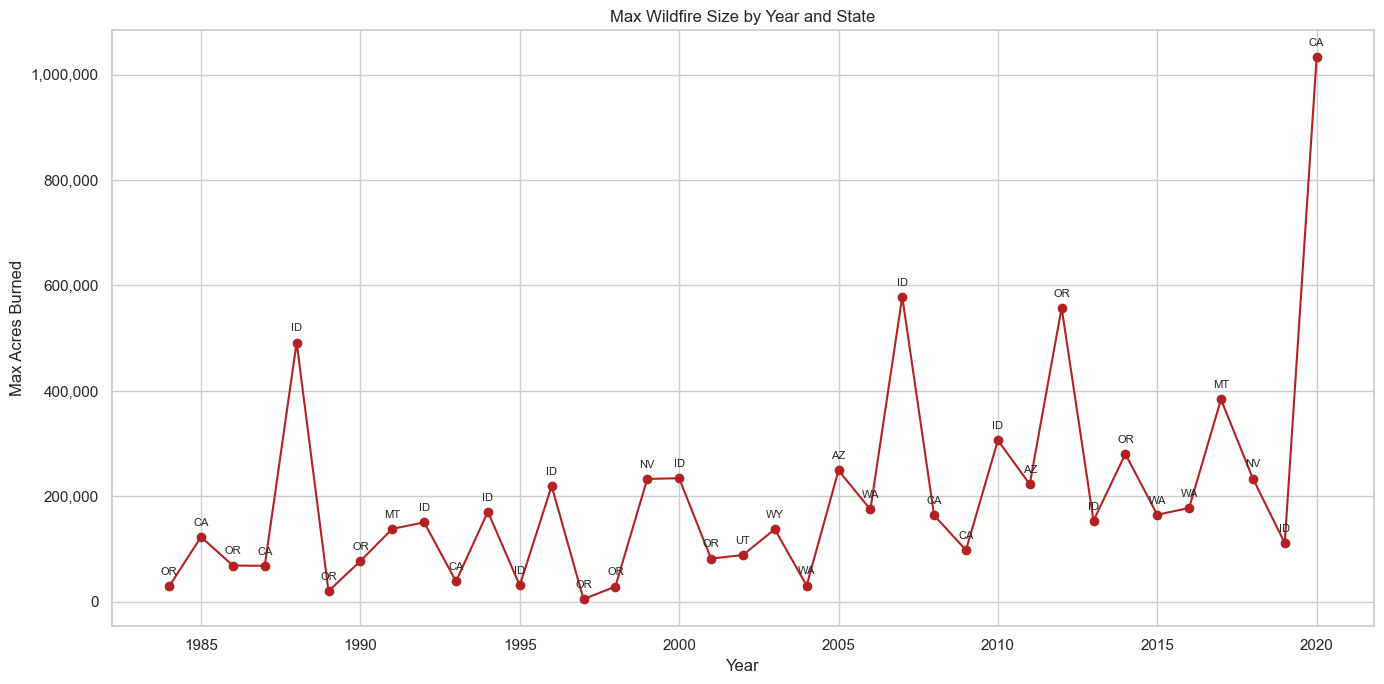

In [272]:
#Get the max acres burned in all states per year
state_max_acres = df_clean[state_acres].max(axis=1)

#Get the state column name where the max occured
state_where_max_occured = df[state_acres].idxmax(axis=1)

# Add columns to DF
df_clean['state_max_acres'] = df_clean[state_acres].max(axis=1)
df_clean['state_where_max_occurred'] = df_clean[state_acres].idxmax(axis=1).str.replace('_acres_max', '', regex=False)

# Plot
plt.figure(figsize=(14, 7))
plt.plot(df_clean['YEAR'], df_clean['state_max_acres'], marker='o', color='firebrick')

# add state labels to the top of each data point
for i, row in df_clean.iterrows():
    plt.annotate(row['state_where_max_occurred'],
                 (row['YEAR'], row['state_max_acres']),#the point thats getting labelled and its coordinates (x,y)
                 textcoords="offset points", 
                 xytext=(0,8), 
                 ha='center', 
                 fontsize=8) #where text is placed in relation to data point, then define said offset with xytext (o= no horiz shift, 5= move 5 points upward), ha= horiz alignment 

# axis and styling
plt.title('Max Wildfire Size by Year and State')
plt.xlabel('Year')
plt.ylabel('Max Acres Burned')
plt.grid(True)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))#formats the numbers on y-axis, among other things, formats with commas and no decimals

plt.tight_layout()

plt.savefig(r"C:\Users\molly\projects\mid_mile\visualizations\Max_Wildfire_Size_by_Year_and_State")
plt.show()


Plot the top 10 largest fires amongst all states and data based on acres burned



In [255]:
#define new function that adds the name of the fire associated with the max acres burned for each state

def get_name_of_max(row):
    state = row['state_where_max_occurred'] #grabs he state abbreviation from the row and tells us which state had the largest fir for that year
    name_col = f"{state}_name"#creates the column for each states fire name
    return row.get(name_col, 'Unknown')#grabs the fire name from the correct state column

df_clean['name_of_max_fire'] = df_clean.apply(get_name_of_max, axis=1)




Create the Top10 dataframe

In [256]:
df_top10 = df_clean.sort_values(by='state_max_acres', ascending=False).head(10)
print(df_top10[['YEAR', 'state_where_max_occurred', 'state_max_acres', 'name_of_max_fire']])



    YEAR state_where_max_occurred  state_max_acres name_of_max_fire
36  2020                       CA        1032675.0   august complex
23  2007                       ID         578663.7     elk mountain
28  2012                       OR         557996.8        long draw
4   1988                       ID         491780.3       north fork
33  2017                       MT         383865.2      sartin draw
26  2010                       ID         306133.3       long butte
30  2014                       OR         280349.1      saddle draw
21  2005                       AZ         249027.6       cave creek
16  2000                       ID         234230.4       diamond pt
34  2018                       NV         233671.3  south sugarloaf


make the plot, I should have cleaned up the fire names.


state_max_acres = acres burned, 

name_of_max_fire = fire name, 

state_where_max_occured = state, 

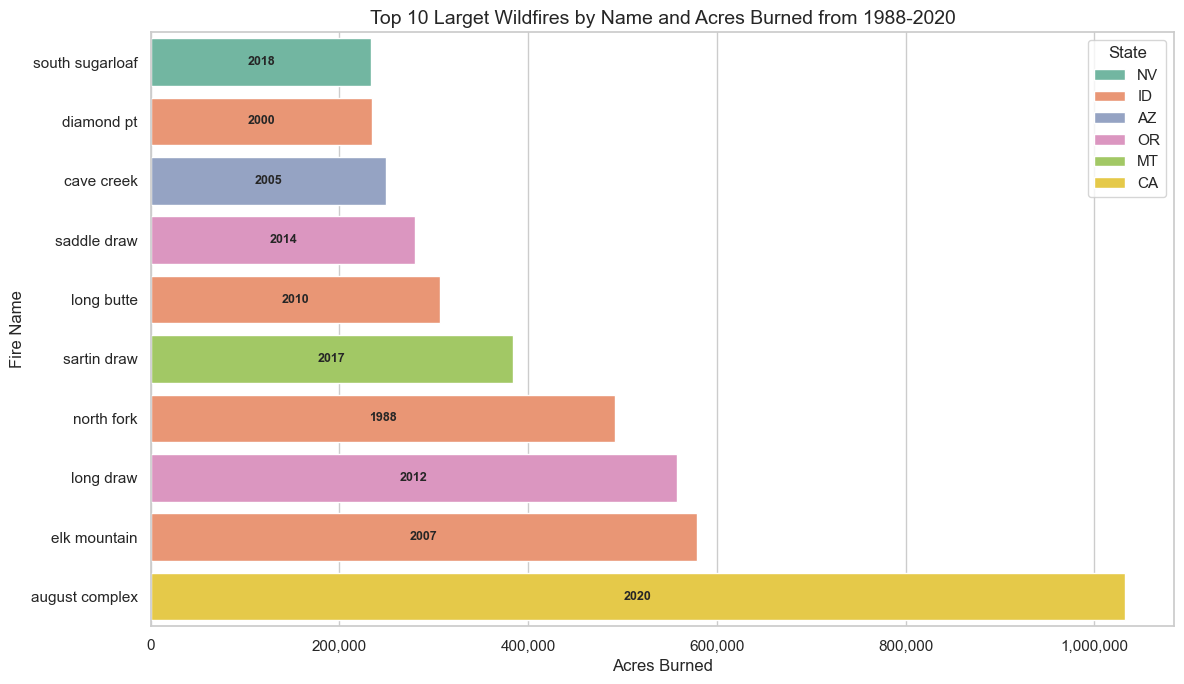

In [273]:
plt.figure(figsize=(12,7))

#adding a sort so the largest fire is on bottom
df_top10_sorted = df_top10.sort_values(by='state_max_acres', ascending=True)

#creates a horizontal barplot
sns.barplot(
    data=df_top10_sorted,
    x='state_max_acres',
    y='name_of_max_fire',
    hue='state_where_max_occurred',
    dodge=False,
    palette='Set2'
)

#switch from .annotate to .text to more easily center the year on the bar plot
for i, row in df_top10_sorted.iterrows():
    plt.text(
        x=row['state_max_acres'] / 2, #plot the X variable and puts the text halfway insdie each bar
        y=row['name_of_max_fire'],#matches the y-axis labels used in the bar plot
        s=str(row['YEAR']),#telling it to put the year at the above coordinates
        ha='center',#fully center year in bar
        va='center', #fully center year in bar
        fontsize=9,
        weight='bold'
    )

#titles and axis
plt.title('Top 10 Larget Wildfires by Name and Acres Burned from 1988-2020', fontsize=14)
plt.xlabel('Acres Burned')
plt.ylabel('Fire Name')

#formats the numbers on *now* x-axis, among other things, formats with commas and no decimals
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.legend(title='State')
plt.tight_layout()

plt.savefig(r"C:\Users\molly\projects\mid_mile\visualizations\Top_10_Larget_Wildfires_by_Name_and_Acres_Burned_from_1988-2020")
plt.show()


Create a heatmap showing the number of fires by state and year

In [258]:
#new df to align years and states
heatmap_df = df_clean[['YEAR'] + state_acres].copy()
heatmap_df = heatmap_df.set_index('YEAR')

heatmap_df

,AZ_acres_max,CA_acres_max,CO_acres_max,ID_acres_max,MT_acres_max,NM_acres_max,NV_acres_max,OR_acres_max,UT_acres_max,WA_acres_max,WY_acres_max
YEAR,,,,,,,,,,,
1984,523.1,11262.9,217.6,8293.0,18780.7,NaN,22880.9,28870.2,401.5,115.8,129.2
1985,400.0,122709.7,1880.5,63109.2,33028.1,NaN,97244.5,54323.2,2245.5,36905.4,1033.0
1986,2279.2,12121.7,NaN,53298.3,123.8,NaN,17228.5,68546.0,6850.4,656.0,4177.0
1987,11585.1,67997.2,1035.4,62674.5,567.0,NaN,14387.9,13623.6,1336.2,20379.1,2390.6
1988,1897.2,13396.6,16201.8,491780.3,491780.3,2069.7,14561.5,59610.2,5672.5,22145.1,491780.3
1989,473.0,4711.7,3288.8,19467.0,2648.2,1176.2,9541.6,20066.1,16698.4,3455.2,3320.5
1990,3485.6,20537.2,3691.2,72009.2,33225.3,1868.3,645.6,76964.7,14380.8,24840.7,NaN
1991,3158.2,5971.6,473.3,8333.0,138105.4,199.0,1177.0,68799.7,2354.9,6229.5,8635.8
1992,743.4,17411.6,133.6,150473.9,955.3,68.7,37771.9,29633.4,3800.9,871.4,384.7


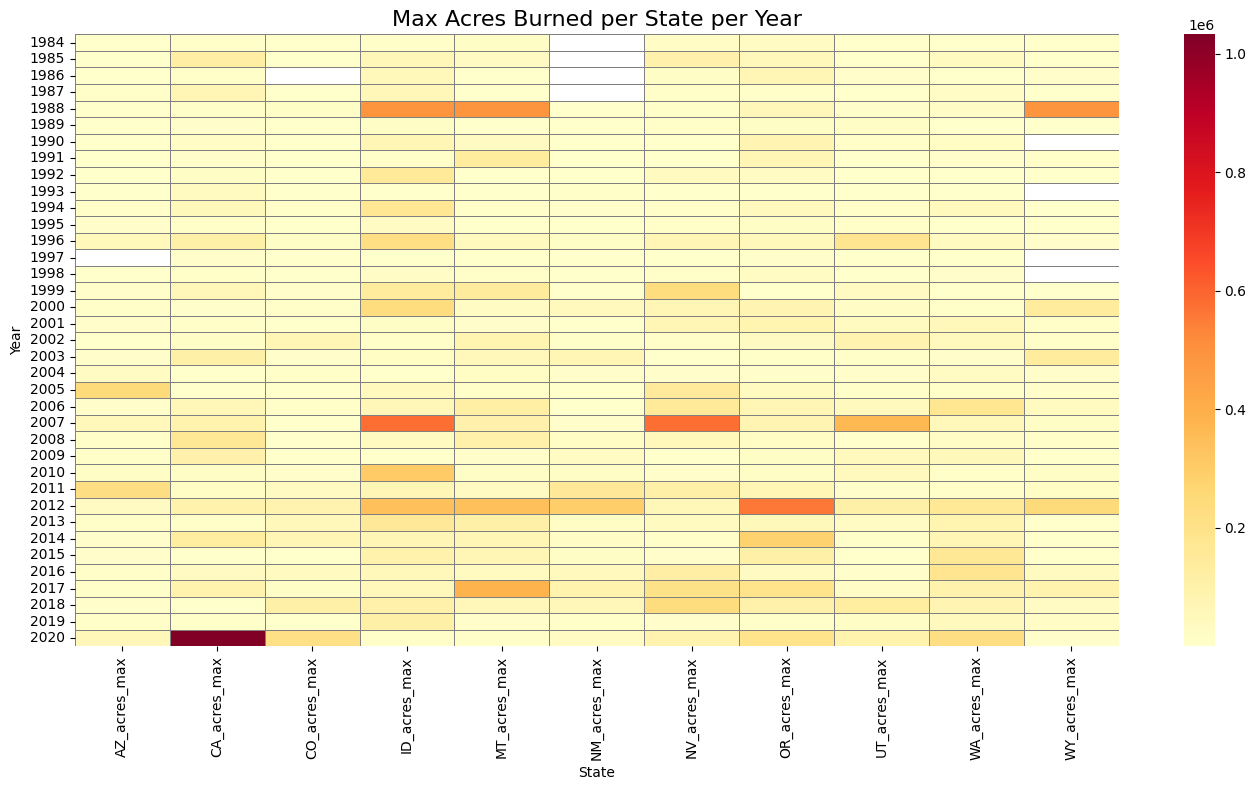

In [259]:
plt.figure(figsize=(14,8))
sns.heatmap(
    heatmap_df,
    cmap='YlOrRd',
    linewidth=0.5,
    linecolor='gray',
    annot=False,
    fmt=',.0f'
)

plt.title('Max Acres Burned per State per Year', fontsize=16)
plt.xlabel('State')
plt.ylabel('Year')
plt.tight_layout()
plt.show()


meh, thats boring, trying something else.

I pretty much copied this code with AI help. I wanted to try and animation and here is what I got.  Worked through line by line to try and understand the parts I hadn't seen before.  Did not write this myself, tweaked for my data.

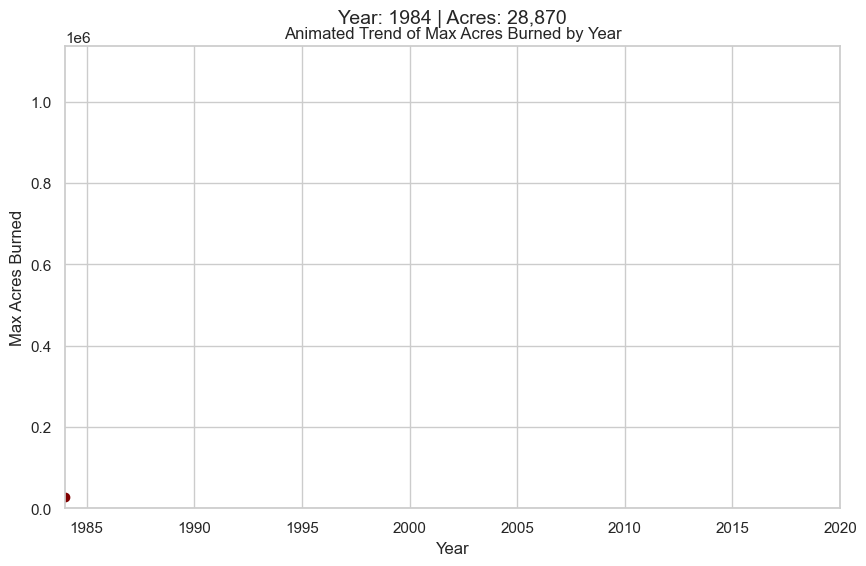

In [266]:

from matplotlib.animation import FuncAnimation

df_anim = df_clean[['YEAR', 'acres_max']].sort_values(by='YEAR')#selects specific columns, year and max acres, then sorts by year so that the plot can grow chronologically

# Set style
sns.set(style="whitegrid")#plots on a white background
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(min(df_anim['YEAR']), max(df_anim['YEAR']))#ensures x-axis spans from earliest to latest year
ax.set_ylim(0, df_anim['acres_max'].max() * 1.1)#ensures enough vertical space for the largest wildfire

line, = ax.plot([], [], color='maroon', linewidth=2, marker='o')#Creates and empty line that gets updated as the animation progresses.  Starts with no data []
title = ax.text(0.5, 1.05, '', transform=ax.transAxes, ha='center', fontsize=14)#creates a changing label above the plot that shows year + acres
ax.set_xlabel('Year')
ax.set_ylabel('Max Acres Burned')
ax.set_title('Animated Trend of Max Acres Burned by Year')

# Animation function, called once per frame of animation. Builds the plot one point at a time. Updates the line data and the title with the current year and value.
def update(frame):
    x = df_anim['YEAR'][:frame+1]
    y = df_anim['acres_max'][:frame+1]
    line.set_data(x, y)
    title.set_text(f"Year: {x.iloc[-1]} | Acres: {y.iloc[-1]:,.0f}")
    return line, title

ani = FuncAnimation(fig, update, frames=len(df_anim), interval=400, blit=False)# interval = 400 ms per frame, blit= ensures full redraw each time

from IPython.display import HTML
HTML(ani.to_jshtml())#displays in Jupyter notebook



In [268]:
ani.save(r"C:\Users\molly\projects\mid_mile\visualizations\wildfire_max_acres.gif", writer='pillow', fps=5)#saves as a GIF
